# CI Portfolio Project 5 - Filter Maintenance Predictor 2022
## **ML Model - Predict Remaining Useful Life (RUL)**

## Objectives

Answer [Business Requirement 1](https://github.com/roeszler/filter-maintenance-predictor/blob/main/README.md#business-requirements) :
*   Fit and evaluate a **regression model** to predict the Remaining Useful Life of a replaceable part
*   Fit and evaluate a **classification model** to predict the Remaining Useful Life of a replaceable part should the regressor not perform well.

## Inputs

Data cleaning:
* outputs/datasets/cleaned/dfCleanTotal.csv

## Outputs

* Train set (features and target)
* Test set (features and target)
* Validation set (features and target)
* ML pipeline to predict RUL
* A map of the labels
* Feature Importance Plot



---

### Change working directory

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor/jupyter_notebooks'

In [2]:
os.chdir(os.path.dirname(current_dir))
print("Current directory set to new location")

Current directory set to new location


In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/filter-maintenance-predictor'

---

## The major steps in this Regressor Pipeline

<details>
<summary style="font-size: 0.9rem;"><strong>1. ML Pipeline: Regressor</strong> (Dropdown List)</summary>

* Create Regressor Pipeline
* Split the train set
* Grid Search CV SKLearn
    * Use standard hyperparameters to find most suitable algorithm
    * Extensive search on most suitable algorithm to find the best hyperparameter configuration
* Assess Feature Performance
* Evaluate Regressor
* Create Train, Test, Validation Sets
</details></br>


<details>
<summary style="font-size: 0.9rem;"><strong>2. ML Pipeline: Regressor + Principal Component Analysis</strong> (PCA)</summary>

* Prepare the Data for the Pipeline
* Create Regressor + PCA Pipeline
* Split the train and validation sets
* Grid Search CV SKLearn
    * Use standard hyperparameters to find most suitable algorithm
    * Do an extensive search on most suitable algorithm to find the best hyperparameter configuration
* Assess Feature Performance
* Evaluate Regressor
* Create Train, Test, Validation Sets
</details></br>

<details>
<summary style="font-size: 0.9rem;"><strong>3. Convert Regression to Classification</strong> (Optionally)</summary>

* Convert numerical target to bins, and check if it is balanced
* Rewrite Pipeline for ML Modelling
* Load Algorithms For Classification
* Split the Train Test sets:
* Grid Search CV SKLearn:
    * Use standard hyper parameters to find most suitable model
    * Grid Search CV
    * Check Result
* Do an extensive search on the most suitable model to find the best hyperparameter configuration.
    * Define Model Parameters
    * Extensive Grid Search CV                             
    * Check Results
    * Check Best Model
    * Parameters for best model
    * Define the best clf_pipeline
* Assess Feature Importance
* Evaluate Classifier on Train and Test Sets
    * Custom Function
    * List that relates the classes and tenure interval
</details></br>

<details><summary style="font-size: 0.9rem;"><strong>4. Decide which pipeline to use</strong></summary></details></br>

<details>
<summary style="font-size: 0.9rem;"><strong>5. Refit with the best features</strong></summary>

* Rewrite Pipeline
* Split Train Test Set with only best features
* Subset best features
* Grid Search CV SKLearn
* Best Parameters
    * Manually
* Grid Search CV
* Check Results
* Check Best Model
* Define the best pipeline
</details></br>

<details><summary style="font-size: 0.9rem;"><strong>6. Assess Feature Importance</strong></summary></details></br>

<details><summary style="font-size: 0.9rem;"><strong>7. Push Files to Repo</strong></summary></details>

<!-- Modelling:
The hypothesis part of the process where you will find out whether you can answer the question.
* Identify what techniques to use.
* Split your data into train, validate and test sets.
* Build and train the models with the train data set.
* Validate Models and hyper-parameter : Trial different machine learning methods and models with the validation data set.
* Poor Results - return to data preparation for feature engineering
* Successful hypothesis - where the inputs from the data set are mapped to the output target / label appropriately to evaluate.

5. Evaluation:
Where you test whether the model can predict unseen data.
* Test Dataset
* Choose the model that meets the business success criteria best.
* Review and document the work that you have done.
* If your project meets the success metrics you defined with your customer?
- Ready to deploy. -->

---

### Load Cleaned Data
Target variable for regressor, remove from classifier and drop other variables not required

In [4]:
import numpy as np
import pandas as pd

df_total = pd.read_csv(f'outputs/datasets/transformed/dfTransformedTotal.csv') # data with all negative log_EWM values removed
df_total_model = (pd.read_csv('outputs/datasets/transformed/dfTransformedTotal.csv')
        .drop(labels=['4point_EWM', 'change_DP', 'change_EWM'], axis=1)
    )
df_train_even_dist = (pd.read_csv(f'outputs/datasets/transformed/dfTransformedTrain.csv')
        .drop(labels=['4point_EWM', 'change_DP', 'change_EWM', 'std_DP', 'median_DP', 'bin_size'], axis=1)
    )
print(df_total.shape, '= df_total')
print(df_total_model.shape, '= df_total_model')
print(df_train_even_dist.shape, '= df_train_even_dist')
df_total

(69686, 15) = df_total
(69686, 12) = df_total_model
(20931, 12) = df_train_even_dist


,Data_No,Differential_pressure,4point_EWM,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,change_DP,change_EWM,mass_g,cumulative_mass_g,Tt,filter_balance
0,1,1.537182,1.046296,0.045257,54.143527,5.5,236.428943,1.025,NaN,0.000000,0.327257,0.242340,13.328682,44.9,99.74
1,1,1.537182,1.242651,0.217247,54.518255,5.6,236.428943,1.025,NaN,0.000000,0.196354,0.242340,13.571021,44.9,99.74
2,1,1.537182,1.360463,0.307825,54.658781,5.7,236.428943,1.025,NaN,0.000000,0.117813,0.242340,13.813361,44.9,99.74
3,1,3.345631,2.154530,0.767573,54.780562,5.8,236.428943,1.025,NaN,1.808449,0.794067,0.242340,14.055701,44.9,99.44
4,1,5.244502,3.390519,1.220983,54.574466,5.9,236.428943,1.025,NaN,1.898871,1.235989,0.242340,14.298040,44.9,99.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69681,100,465.494800,457.888170,6.126625,82.675521,52.0,316.985065,1.200,8.2,6.329500,5.071087,0.380382,197.798681,52.4,22.42
69682,100,464.228900,460.424462,6.132149,82.421873,52.1,316.985065,1.200,8.1,-1.265900,2.536292,0.380382,198.179063,52.4,22.63
69683,100,466.037300,462.669597,6.137013,82.743156,52.2,316.985065,1.200,8.0,1.808400,2.245135,0.380382,198.559445,52.4,22.33
69684,100,472.276500,466.512358,6.145285,82.785427,52.3,316.985065,1.200,7.9,6.239200,3.842761,0.380382,198.939827,52.4,21.29


In [5]:
df_total_model

,Data_No,Differential_pressure,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,mass_g,cumulative_mass_g,Tt,filter_balance
0,1,1.537182,0.045257,54.143527,5.5,236.428943,1.025,NaN,0.242340,13.328682,44.9,99.74
1,1,1.537182,0.217247,54.518255,5.6,236.428943,1.025,NaN,0.242340,13.571021,44.9,99.74
2,1,1.537182,0.307825,54.658781,5.7,236.428943,1.025,NaN,0.242340,13.813361,44.9,99.74
3,1,3.345631,0.767573,54.780562,5.8,236.428943,1.025,NaN,0.242340,14.055701,44.9,99.44
4,1,5.244502,1.220983,54.574466,5.9,236.428943,1.025,NaN,0.242340,14.298040,44.9,99.13
...,...,...,...,...,...,...,...,...,...,...,...,...
69681,100,465.494800,6.126625,82.675521,52.0,316.985065,1.200,8.2,0.380382,197.798681,52.4,22.42
69682,100,464.228900,6.132149,82.421873,52.1,316.985065,1.200,8.1,0.380382,198.179063,52.4,22.63
69683,100,466.037300,6.137013,82.743156,52.2,316.985065,1.200,8.0,0.380382,198.559445,52.4,22.33
69684,100,472.276500,6.145285,82.785427,52.3,316.985065,1.200,7.9,0.380382,198.939827,52.4,21.29


---

# ML Pipeline : Regressor
## Create Regressor Pipeline
### Set the Transformations
* Smart correlation
* feat_scaling
* feat_selection
* Modelling
* Model as variable

Note: Numerical Transformation not required as data supplied as integers

In [6]:
df_total_model

,Data_No,Differential_pressure,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,mass_g,cumulative_mass_g,Tt,filter_balance
0,1,1.537182,0.045257,54.143527,5.5,236.428943,1.025,NaN,0.242340,13.328682,44.9,99.74
1,1,1.537182,0.217247,54.518255,5.6,236.428943,1.025,NaN,0.242340,13.571021,44.9,99.74
2,1,1.537182,0.307825,54.658781,5.7,236.428943,1.025,NaN,0.242340,13.813361,44.9,99.74
3,1,3.345631,0.767573,54.780562,5.8,236.428943,1.025,NaN,0.242340,14.055701,44.9,99.44
4,1,5.244502,1.220983,54.574466,5.9,236.428943,1.025,NaN,0.242340,14.298040,44.9,99.13
...,...,...,...,...,...,...,...,...,...,...,...,...
69681,100,465.494800,6.126625,82.675521,52.0,316.985065,1.200,8.2,0.380382,197.798681,52.4,22.42
69682,100,464.228900,6.132149,82.421873,52.1,316.985065,1.200,8.1,0.380382,198.179063,52.4,22.63
69683,100,466.037300,6.137013,82.743156,52.2,316.985065,1.200,8.0,0.380382,198.559445,52.4,22.33
69684,100,472.276500,6.145285,82.785427,52.3,316.985065,1.200,7.9,0.380382,198.939827,52.4,21.29


## Split the data into Train, Test, Validate

Data is discrete however in bins, so:
#### Define Cleaned **Train** & **Test** Datasets

In [7]:
df_total_model

,Data_No,Differential_pressure,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,mass_g,cumulative_mass_g,Tt,filter_balance
0,1,1.537182,0.045257,54.143527,5.5,236.428943,1.025,NaN,0.242340,13.328682,44.9,99.74
1,1,1.537182,0.217247,54.518255,5.6,236.428943,1.025,NaN,0.242340,13.571021,44.9,99.74
2,1,1.537182,0.307825,54.658781,5.7,236.428943,1.025,NaN,0.242340,13.813361,44.9,99.74
3,1,3.345631,0.767573,54.780562,5.8,236.428943,1.025,NaN,0.242340,14.055701,44.9,99.44
4,1,5.244502,1.220983,54.574466,5.9,236.428943,1.025,NaN,0.242340,14.298040,44.9,99.13
...,...,...,...,...,...,...,...,...,...,...,...,...
69681,100,465.494800,6.126625,82.675521,52.0,316.985065,1.200,8.2,0.380382,197.798681,52.4,22.42
69682,100,464.228900,6.132149,82.421873,52.1,316.985065,1.200,8.1,0.380382,198.179063,52.4,22.63
69683,100,466.037300,6.137013,82.743156,52.2,316.985065,1.200,8.0,0.380382,198.559445,52.4,22.33
69684,100,472.276500,6.145285,82.785427,52.3,316.985065,1.200,7.9,0.380382,198.939827,52.4,21.29


In [78]:
n = df_total_model['Data_No'].iloc[0:len(df_total)]
# df_train = df_total_model[n < 51].reset_index(drop=True)
df_test = df_total_model[n > 50].reset_index(drop=True)
df_train = df_train_even_dist
# df_train = df_train_even_dist.fillna(0)
df_train_model = df_train_even_dist
# df_train_model = df_train_even_dist.fillna(0)
df_train

,Data_No,Differential_pressure,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,mass_g,cumulative_mass_g,Tt,filter_balance
0,8,4.159433,0.509088,79.771690,0.6,59.107236,0.9,NaN,0.053197,0.319179,179.4,99.31
1,8,6.691262,1.301490,80.820436,0.7,59.107236,0.9,NaN,0.053197,0.372376,179.4,98.88
2,8,9.856047,1.816010,80.605533,0.8,59.107236,0.9,NaN,0.053197,0.425572,179.4,98.36
3,8,12.749570,2.173409,80.639911,0.9,59.107236,0.9,NaN,0.053197,0.478769,179.4,97.88
4,8,14.738860,2.413094,80.786058,1.0,59.107236,0.9,NaN,0.053197,0.531965,179.4,97.54
...,...,...,...,...,...,...,...,...,...,...,...,...
20926,50,359.971800,5.878279,58.721877,59.4,177.321707,1.2,NaN,0.212786,126.394913,59.8,40.00
20927,50,360.785600,5.882293,58.699919,59.5,177.321707,1.2,NaN,0.212786,126.607699,59.8,39.87
20928,50,361.509000,5.885498,58.743820,59.6,177.321707,1.2,NaN,0.212786,126.820485,59.8,39.75
20929,50,362.051500,5.888018,58.601152,59.7,177.321707,1.2,NaN,0.212786,127.033271,59.8,39.66


In [9]:
df_test

,Data_No,Differential_pressure,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,mass_g,cumulative_mass_g,Tt,filter_balance
0,51,2.622251,0.148056,55.524146,0.4,236.428943,1.025,58.6,0.242340,0.969359,36.6,99.56
1,51,3.888165,0.811380,55.852018,0.5,236.428943,1.025,58.5,0.242340,1.211698,36.6,99.35
2,51,4.521122,1.150273,56.130203,0.6,236.428943,1.025,58.4,0.242340,1.454038,36.6,99.25
3,51,4.521122,1.309382,56.150070,0.7,236.428943,1.025,58.3,0.242340,1.696378,36.6,99.25
4,51,4.521122,1.393959,56.090457,0.8,236.428943,1.025,58.2,0.242340,1.938717,36.6,99.25
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,100,465.494800,6.126625,82.675521,52.0,316.985065,1.200,8.2,0.380382,197.798681,52.4,22.42
36358,100,464.228900,6.132149,82.421873,52.1,316.985065,1.200,8.1,0.380382,198.179063,52.4,22.63
36359,100,466.037300,6.137013,82.743156,52.2,316.985065,1.200,8.0,0.380382,198.559445,52.4,22.33
36360,100,472.276500,6.145285,82.785427,52.3,316.985065,1.200,7.9,0.380382,198.939827,52.4,21.29


#### Determine **Target** and **Independent** Variables and Extract **Validation** Dataset

As discussed in the readme, this data has been supplied pre-split into **train** and **test** within unique **data bins**. 
We extract random observations from the **test** dataset to create a **validation** set, in a 70:30 split.


In [10]:
df_test

,Data_No,Differential_pressure,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,mass_g,cumulative_mass_g,Tt,filter_balance
0,51,2.622251,0.148056,55.524146,0.4,236.428943,1.025,58.6,0.242340,0.969359,36.6,99.56
1,51,3.888165,0.811380,55.852018,0.5,236.428943,1.025,58.5,0.242340,1.211698,36.6,99.35
2,51,4.521122,1.150273,56.130203,0.6,236.428943,1.025,58.4,0.242340,1.454038,36.6,99.25
3,51,4.521122,1.309382,56.150070,0.7,236.428943,1.025,58.3,0.242340,1.696378,36.6,99.25
4,51,4.521122,1.393959,56.090457,0.8,236.428943,1.025,58.2,0.242340,1.938717,36.6,99.25
...,...,...,...,...,...,...,...,...,...,...,...,...
36357,100,465.494800,6.126625,82.675521,52.0,316.985065,1.200,8.2,0.380382,197.798681,52.4,22.42
36358,100,464.228900,6.132149,82.421873,52.1,316.985065,1.200,8.1,0.380382,198.179063,52.4,22.63
36359,100,466.037300,6.137013,82.743156,52.2,316.985065,1.200,8.0,0.380382,198.559445,52.4,22.33
36360,100,472.276500,6.145285,82.785427,52.3,316.985065,1.200,7.9,0.380382,198.939827,52.4,21.29


Review correlations, Drop Features and Split into **70% test** and **30% validate**. 

In [11]:
from sklearn.model_selection import train_test_split
from feature_engine.selection import SmartCorrelatedSelection

corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")
df_engineering = df_test.copy()
corr_sel.fit_transform(df_engineering)

# log_EWM = df_test['log_EWM']
features_to_drop_test = corr_sel.features_to_drop_
# features_to_drop_test = [e for e in features_to_drop_test if e not in ('log_EWM', 'Dust_feed', 'RUL')] # prevent these requirements from being removed in V1
features_to_drop_test = [e for e in features_to_drop_test if e not in ('Dust_feed', 'RUL')] # prevent these requirements from being removed in V1
features_to_drop_test.insert(0, 'Differential_pressure') # include differential pressure to be removed
X = df_test.drop(features_to_drop_test,axis=1)
# y = df_test['Differential_pressure'] # define the target variable
y = df_test['log_EWM'] # define the target variable

# X.loc[:, 'log_EWM'] = log_EWM
# sma_calc = df_bin['Differential_pressure'].rolling(4).mean()
# X.insert(loc=2, column='log_EWM', value=log_EWM)

X_test, X_validate, y_test, y_validate = train_test_split(X,y,test_size=0.30, random_state=0)

print(X_test.shape, 'X_test')
print(X_validate.shape, 'X_validate')
print(y_test.shape, 'y_test')
print(y_validate.shape, 'y_validate')
print('\nFeatures Suggested to Drop :\n', features_to_drop_test)

(25453, 7) X_test
(10909, 7) X_validate
(25453,) y_test
(10909,) y_validate

Features Suggested to Drop :
 ['Differential_pressure', 'Time', 'mass_g', 'cumulative_mass_g', 'filter_balance']


In [12]:
X_test

,Data_No,log_EWM,Flow_rate,Dust_feed,Dust,RUL,Tt
2168,56,1.574637,57.383039,158.492533,1.025,95.8,71.3
20305,77,4.110545,57.690319,237.738799,1.025,40.6,60.2
32959,94,2.701905,60.006667,316.985065,0.900,22.7,24.1
24724,79,5.329106,81.686305,59.107236,1.200,122.2,258.1
34580,99,3.762976,80.313263,59.107236,1.200,168.4,248.2
...,...,...,...,...,...,...,...
20757,78,2.108220,83.445949,59.107236,1.200,261.7,243.8
32103,91,2.025411,80.846225,237.738799,0.900,38.8,49.9
30403,85,4.211845,80.485188,177.321707,1.200,48.5,66.0
21243,78,3.385567,82.624780,59.107236,1.200,213.1,243.8


#### Define **X_train**, **y_train** variables

In [13]:
df_train

,Data_No,Differential_pressure,log_EWM,Flow_rate,Time,Dust_feed,Dust,RUL,mass_g,cumulative_mass_g,Tt,filter_balance
0,8,4.159433,0.509088,79.771690,0.6,59.107236,0.9,NaN,0.053197,0.319179,179.4,99.31
1,8,6.691262,1.301490,80.820436,0.7,59.107236,0.9,NaN,0.053197,0.372376,179.4,98.88
2,8,9.856047,1.816010,80.605533,0.8,59.107236,0.9,NaN,0.053197,0.425572,179.4,98.36
3,8,12.749570,2.173409,80.639911,0.9,59.107236,0.9,NaN,0.053197,0.478769,179.4,97.88
4,8,14.738860,2.413094,80.786058,1.0,59.107236,0.9,NaN,0.053197,0.531965,179.4,97.54
...,...,...,...,...,...,...,...,...,...,...,...,...
20926,50,359.971800,5.878279,58.721877,59.4,177.321707,1.2,NaN,0.212786,126.394913,59.8,40.00
20927,50,360.785600,5.882293,58.699919,59.5,177.321707,1.2,NaN,0.212786,126.607699,59.8,39.87
20928,50,361.509000,5.885498,58.743820,59.6,177.321707,1.2,NaN,0.212786,126.820485,59.8,39.75
20929,50,362.051500,5.888018,58.601152,59.7,177.321707,1.2,NaN,0.212786,127.033271,59.8,39.66


Create **train** dataset with the same variables dropped as the **test** dataset

In [14]:
features_to_drop_test.insert(0, 'RUL')

X_train = df_train.drop(features_to_drop_test,axis=1)
y_train = df_train['Differential_pressure']

print(X_train.shape, 'X_train')
print(y_train.shape, 'y_train')
print('\nFeatures Dropped :\n', features_to_drop_test)

(20931, 6) X_train
(20931,) y_train

Features Dropped :
 ['RUL', 'Differential_pressure', 'Time', 'mass_g', 'cumulative_mass_g', 'filter_balance']


In [15]:
X_train

,Data_No,log_EWM,Flow_rate,Dust_feed,Dust,Tt
0,8,0.509088,79.771690,59.107236,0.9,179.4
1,8,1.301490,80.820436,59.107236,0.9,179.4
2,8,1.816010,80.605533,59.107236,0.9,179.4
3,8,2.173409,80.639911,59.107236,0.9,179.4
4,8,2.413094,80.786058,59.107236,0.9,179.4
...,...,...,...,...,...,...
20926,50,5.878279,58.721877,177.321707,1.2,59.8
20927,50,5.882293,58.699919,177.321707,1.2,59.8
20928,50,5.885498,58.743820,177.321707,1.2,59.8
20929,50,5.888018,58.601152,177.321707,1.2,59.8


In [16]:
y_train

0          4.159433
1          6.691262
2          9.856047
3         12.749570
4         14.738860
            ...    
20926    359.971800
20927    360.785600
20928    361.509000
20929    362.051500
20930    366.482200
Name: Differential_pressure, Length: 20931, dtype: float64

## Handling Target Imbalance
### No need to handle target imbalance in this **regression model**.
* Typically we only need to create a single pipeline for Classification or Regression task. 
* The exception occurs when we need to handle a **classification target imbalance**, which requires more than one model to process 

#### ML Pipeline for **Fitting Models** (regression)
Import features & models

In [17]:
# Feature Management
from sklearn.pipeline import Pipeline
from feature_engine.encoding import OrdinalEncoder
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.feature_selection import SelectFromModel

# ML regression algorithms
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor

Define the pipeline

In [18]:
def PipelineOptimization(model):
    pipeline_base = Pipeline([
        # ("OrdinalCategoricalEncoder", OrdinalEncoder(encoding_method='arbitrary',
        #                                              variables=['Differential_pressure', 'Flow_rate',
        #                                                         # 'log_EWM', 'Time', 'mass_g', 'Tt', 'filter_balance',
        #                                                         'Dust_feed', 'Dust', 'cumulative_mass_g'])),
        ("SmartCorrelatedSelection", SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.6, selection_method="variance")),
        ("feat_scaling", StandardScaler()),
        ("feat_selection",  SelectFromModel(model)),
        ("model", model),
    ])
    return pipeline_base

#### **Custom Class** to fit a set of algorithms, each with its own set of hyperparameters

In [19]:
from sklearn.model_selection import GridSearchCV


class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model = PipelineOptimization(self.models[key]) # the model

            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score (R²)'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score (R²)': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]
                scores.append(r.reshape(len(params), 1))

            all_scores = np.hstack(scores)
            for p, s in zip(params, all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score',
                   'mean_score (R²)', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns], self.grid_searches


### Use standard hyperparameters to find most suitable algorithm for the data

In [20]:
models_quick_search = {
    'LinearRegression': LinearRegression(),
    'DecisionTreeRegressor': DecisionTreeRegressor(random_state=0),
    'RandomForestRegressor': RandomForestRegressor(random_state=0),
    'ExtraTreesRegressor': ExtraTreesRegressor(random_state=0),
    'AdaBoostRegressor': AdaBoostRegressor(random_state=0),
    'GradientBoostingRegressor': GradientBoostingRegressor(random_state=0),
    'XGBRegressor': XGBRegressor(random_state=0),
    'SGDRegressor': SGDRegressor(random_state=0),
}

params_quick_search = {
    'LinearRegression': {},
    'DecisionTreeRegressor': {},
    'RandomForestRegressor': {},
    'ExtraTreesRegressor': {},
    'AdaBoostRegressor': {},
    'GradientBoostingRegressor': {},
    'XGBRegressor': {},
    'SGDRegressor': {},
}

#### Fit the pipelines, using the above models with **default hyperparameters** to find the most suitable model
* Parsed the train set
* Set the performance metric as an R2 score (Regression: described in our ML business case)
* Cross validation as 5 (rule of thumb)

In [21]:
search = HyperparameterOptimizationSearch(models=models_quick_search, params=params_quick_search)
search.fit(X_train, y_train, scoring='r2', n_jobs=-1, cv=5)


Running GridSearchCV for LinearRegression 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for RandomForestRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for ExtraTreesRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits

Running GridSearchCV for SGDRegressor 

Fitting 5 folds for each of 1 candidates, totalling 5 fits


Check results

In [22]:
grid_search_summary_quick, grid_search_pipelines_quick = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_quick

,estimator,min_score,mean_score (R²),max_score,std_score
6,XGBRegressor,0.999442,0.99969,0.999785,0.000129
5,GradientBoostingRegressor,0.999336,0.99965,0.999763,0.000163
2,RandomForestRegressor,0.999264,0.999616,0.999752,0.000184
3,ExtraTreesRegressor,0.999132,0.999556,0.99972,0.000222
1,DecisionTreeRegressor,0.998984,0.999471,0.999669,0.000256
4,AdaBoostRegressor,0.951972,0.986593,0.998113,0.017436
0,LinearRegression,-0.537714,0.448415,0.753499,0.49414
7,SGDRegressor,-0.559711,0.443811,0.755234,0.502959


In [23]:
X_train

,Data_No,log_EWM,Flow_rate,Dust_feed,Dust,Tt
0,8,0.509088,79.771690,59.107236,0.9,179.4
1,8,1.301490,80.820436,59.107236,0.9,179.4
2,8,1.816010,80.605533,59.107236,0.9,179.4
3,8,2.173409,80.639911,59.107236,0.9,179.4
4,8,2.413094,80.786058,59.107236,0.9,179.4
...,...,...,...,...,...,...
20926,50,5.878279,58.721877,177.321707,1.2,59.8
20927,50,5.882293,58.699919,177.321707,1.2,59.8
20928,50,5.885498,58.743820,177.321707,1.2,59.8
20929,50,5.888018,58.601152,177.321707,1.2,59.8


In [24]:
X_test

,Data_No,log_EWM,Flow_rate,Dust_feed,Dust,RUL,Tt
2168,56,1.574637,57.383039,158.492533,1.025,95.8,71.3
20305,77,4.110545,57.690319,237.738799,1.025,40.6,60.2
32959,94,2.701905,60.006667,316.985065,0.900,22.7,24.1
24724,79,5.329106,81.686305,59.107236,1.200,122.2,258.1
34580,99,3.762976,80.313263,59.107236,1.200,168.4,248.2
...,...,...,...,...,...,...,...
20757,78,2.108220,83.445949,59.107236,1.200,261.7,243.8
32103,91,2.025411,80.846225,237.738799,0.900,38.8,49.9
30403,85,4.211845,80.485188,177.321707,1.200,48.5,66.0
21243,78,3.385567,82.624780,59.107236,1.200,213.1,243.8


#### Observations

* The average **R² score** (mean_score) indicates how well a model of the data fits the actual data. It ranges from **0.98 to 0.99**, which is exceptional.
    * A value of R² score = 1 represents a perfect fit.

* The R² score is much higher than the **0.7** tolerance we decided in the business case.
* We can have our choice of most of the regressors. The best result is the **ExtremeGradientBoosting Regressor** however any of **GradientBoosting Regressor**, **RandomForest**, **ExtraTree**, **DecisionTree** or **AdaptiveBoost** regressors perform above our business requirements.
* The Linear and Stochastic Gradient Descent regressors under perform and will not be included for consideration in this business case.
<!-- * We will perform an extensive search to hopefully improve performance. -->

In [ ]:
grid_search_summary_quick

---

### Do an extensive search on the most suitable model to find the best hyperparameter configuration.
Define model and parameters for each extensive search

#### XGBRegressor Model

In [25]:
# documentation to help on hyperparameter list: 
# https://xgboost.readthedocs.io/en/latest/parameter.html

models_search = {
    'XGBRegressor': XGBRegressor(),
}

params_search = {
    'XGBRegressor':{
        'model__max_depth': [2, 4, 6],
        'model__n_estimators': [50, 100, 200, 400, 600, 20931],
    }
}

Extensive GridSearch CV

In [26]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for XGBRegressor 

Fitting 5 folds for each of 9 candidates, totalling 45 fits


Check results

In [27]:
grid_search_summary_XGBR, grid_search_pipelines_XGBR = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_XGBR

,estimator,min_score,mean_score (R²),max_score,std_score,model__max_depth,model__n_estimators
5,XGBRegressor,0.999445,0.999692,0.999788,0.000128,4,200
6,XGBRegressor,0.999439,0.99969,0.999789,0.000131,6,50
7,XGBRegressor,0.999442,0.99969,0.999785,0.000129,6,100
8,XGBRegressor,0.99944,0.999684,0.999779,0.000126,6,200
4,XGBRegressor,0.999421,0.999681,0.999781,0.000137,4,100
3,XGBRegressor,0.999358,0.999642,0.99976,0.000153,4,50
2,XGBRegressor,0.999162,0.999557,0.999712,0.000208,2,200
1,XGBRegressor,0.998508,0.999203,0.999529,0.000375,2,100
0,XGBRegressor,0.996947,0.998324,0.999166,0.000795,2,50


#### GradientBoostingRegressor Model (21min)

In [28]:
# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html

models_search = {
    'GradientBoostingRegressor': GradientBoostingRegressor(),
}

params_search = {
    'GradientBoostingRegressor':{
        'model__loss': ['squared_error', 'huber', 'absolute_error', 'quantile'],
        'model__learning_rate': [1e-1,1e-2,1e-3],
        'model__n_estimators': [100, 200, 300],
        'model__criterion': ['friedman_mse', 'squared_error'],
        'model__max_features': [1.0, 'sqrt', 'log2'],
    }
}

Extensive GridSearch CV

In [29]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for GradientBoostingRegressor 

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


Check Results

In [30]:
grid_search_summary_GBR, grid_search_pipelines_GBR = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_GBR

,estimator,min_score,mean_score (R²),max_score,std_score,model__criterion,model__learning_rate,model__loss,model__max_features,model__n_estimators
2,GradientBoostingRegressor,0.999407,0.999681,0.999778,0.000142,friedman_mse,0.1,squared_error,1.0,300
5,GradientBoostingRegressor,0.999407,0.999681,0.999778,0.000142,friedman_mse,0.1,squared_error,sqrt,300
110,GradientBoostingRegressor,0.999407,0.999681,0.999778,0.000142,squared_error,0.1,squared_error,1.0,300
113,GradientBoostingRegressor,0.999407,0.999681,0.999778,0.000142,squared_error,0.1,squared_error,sqrt,300
8,GradientBoostingRegressor,0.999407,0.999681,0.999778,0.000142,friedman_mse,0.1,squared_error,log2,300
...,...,...,...,...,...,...,...,...,...,...
99,GradientBoostingRegressor,-20.262663,-5.828653,-0.343382,7.401115,friedman_mse,0.001,quantile,1.0,100
102,GradientBoostingRegressor,-20.262663,-5.828653,-0.343382,7.401115,friedman_mse,0.001,quantile,sqrt,100
207,GradientBoostingRegressor,-20.614698,-5.902852,-0.343382,7.535802,squared_error,0.001,quantile,1.0,100
210,GradientBoostingRegressor,-20.614698,-5.902852,-0.343382,7.535802,squared_error,0.001,quantile,sqrt,100


Concatenation to summary

In [31]:
grid_search_summary = pd.concat([grid_search_summary_XGBR, grid_search_summary_GBR], ignore_index=True)
grid_search_pipelines = dict(grid_search_pipelines_XGBR); grid_search_pipelines.update(grid_search_pipelines_GBR)

#### RandomForestRegressor (8min)

In [32]:
# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

models_search = {
    'RandomForestRegressor': RandomForestRegressor(),
}

params_search = {
    'RandomForestRegressor':{
        'model__n_estimators': [100,200,300],
        'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'model__max_depth': [None],
        'model__max_features': [1.0, 'sqrt', 'log2'],
    }
}

Extensive GridSearch CV

In [33]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=2)


Running GridSearchCV for RandomForestRegressor 

Fitting 2 folds for each of 36 candidates, totalling 72 fits


Check Results

In [34]:
grid_search_summary_RForest, grid_search_pipelines_RForest = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_RForest

,estimator,min_score,mean_score (R²),max_score,std_score,model__criterion,model__max_depth,model__max_features,model__n_estimators
31,RandomForestRegressor,0.987616,0.993617,0.999618,0.006001,poisson,None,sqrt,200
4,RandomForestRegressor,0.987585,0.993602,0.999619,0.006017,squared_error,None,sqrt,200
12,RandomForestRegressor,0.987573,0.993602,0.99963,0.006029,absolute_error,None,sqrt,100
1,RandomForestRegressor,0.987576,0.993598,0.99962,0.006022,squared_error,None,1.0,200
6,RandomForestRegressor,0.987575,0.993597,0.999619,0.006022,squared_error,None,log2,100
10,RandomForestRegressor,0.987564,0.993597,0.99963,0.006033,absolute_error,None,1.0,200
26,RandomForestRegressor,0.987569,0.993593,0.999618,0.006025,friedman_mse,None,log2,300
24,RandomForestRegressor,0.987568,0.993592,0.999616,0.006024,friedman_mse,None,log2,100
20,RandomForestRegressor,0.987562,0.993591,0.99962,0.006029,friedman_mse,None,1.0,300
32,RandomForestRegressor,0.987564,0.993591,0.999617,0.006026,poisson,None,sqrt,300


Concatenation to summary

In [35]:
grid_search_summary = pd.concat([grid_search_summary, grid_search_summary_RForest], ignore_index = True)
data = dict(grid_search_pipelines); data.update(grid_search_pipelines_RForest)
grid_search_pipelines = data

#### ExtraTreesRegressor (48min)

In [36]:
# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

models_search = {
    'ExtraTreesRegressor': ExtraTreesRegressor(),
}

params_search = {
    'ExtraTreesRegressor':{
        'model__n_estimators': [100,200,300],
        'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'model__max_depth': [None],
        'model__min_samples_split': [2,4,6],
        'model__max_features': [1.0, 'sqrt', 'log2'],
    }
}

Extensive GridSearch CV

In [37]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=2)


Running GridSearchCV for ExtraTreesRegressor 

Fitting 2 folds for each of 108 candidates, totalling 216 fits


Check Results

In [38]:
grid_search_summary_ExtraTrees, grid_search_pipelines_ExtraTrees = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_ExtraTrees

,estimator,min_score,mean_score (R²),max_score,std_score,model__criterion,model__max_depth,model__max_features,model__min_samples_split,model__n_estimators
39,ExtraTreesRegressor,0.987693,0.993684,0.999675,0.005991,absolute_error,None,sqrt,4,100
41,ExtraTreesRegressor,0.987679,0.993677,0.999675,0.005998,absolute_error,None,sqrt,4,300
48,ExtraTreesRegressor,0.987672,0.993674,0.999675,0.006001,absolute_error,None,log2,4,100
49,ExtraTreesRegressor,0.987672,0.993673,0.999675,0.006002,absolute_error,None,log2,4,200
31,ExtraTreesRegressor,0.987672,0.993673,0.999675,0.006001,absolute_error,None,1.0,4,200
...,...,...,...,...,...,...,...,...,...,...
54,ExtraTreesRegressor,0.987549,0.993549,0.999549,0.006,friedman_mse,None,1.0,2,100
37,ExtraTreesRegressor,0.987549,0.993549,0.999548,0.006,absolute_error,None,sqrt,2,200
45,ExtraTreesRegressor,0.98755,0.993549,0.999548,0.005999,absolute_error,None,log2,2,100
28,ExtraTreesRegressor,0.987549,0.993549,0.999548,0.006,absolute_error,None,1.0,2,200


Concatenation to summary

In [39]:
grid_search_summary = pd.concat([grid_search_summary, grid_search_summary_ExtraTrees], ignore_index = True)
data = dict(grid_search_pipelines); data.update(grid_search_pipelines_ExtraTrees)
grid_search_pipelines = data

#### DecisionTreeRegressor

In [40]:
# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

models_search = {
    'DecisionTreeRegressor': DecisionTreeRegressor(),
}

params_search = {
    'DecisionTreeRegressor':{
        'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
        'model__splitter': ['best', 'random'],
        'model__max_depth': [None],
        'model__min_samples_split': [2,4,6],
        'model__max_features': [1.0, 'sqrt', 'log2', 0.3, None],
    }
}

Extensive GridSearch CV

In [41]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for DecisionTreeRegressor 

Fitting 5 folds for each of 120 candidates, totalling 600 fits


Check Results

In [42]:
grid_search_summary_DTree, grid_search_pipelines_DTree = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_DTree

,estimator,min_score,mean_score (R²),max_score,std_score,model__criterion,model__max_depth,model__max_features,model__min_samples_split,model__splitter
83,DecisionTreeRegressor,0.999317,0.999644,0.999766,0.000169,friedman_mse,None,0.3,6,random
41,DecisionTreeRegressor,0.999327,0.999643,0.999757,0.000165,absolute_error,None,sqrt,6,random
59,DecisionTreeRegressor,0.999325,0.999643,0.999769,0.000166,absolute_error,None,None,6,random
5,DecisionTreeRegressor,0.999327,0.999642,0.999762,0.000165,squared_error,None,1.0,6,random
35,DecisionTreeRegressor,0.999318,0.999641,0.999755,0.000167,absolute_error,None,1.0,6,random
...,...,...,...,...,...,...,...,...,...,...
109,DecisionTreeRegressor,0.998976,0.999465,0.999671,0.000259,poisson,None,0.3,2,random
97,DecisionTreeRegressor,0.998954,0.999461,0.999664,0.000266,poisson,None,sqrt,2,random
25,DecisionTreeRegressor,0.998939,0.99946,0.999667,0.000273,squared_error,None,None,2,random
19,DecisionTreeRegressor,0.998944,0.99946,0.999659,0.000269,squared_error,None,0.3,2,random


Concatenation to summary

In [43]:
grid_search_summary = pd.concat([grid_search_summary, grid_search_summary_DTree], ignore_index=True)
data = dict(grid_search_pipelines); data.update(grid_search_pipelines_DTree)
grid_search_pipelines = data

#### AdaBoostRegressor

In [44]:
from sklearn.ensemble import AdaBoostRegressor

# documentation to help on hyperparameter list: 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

models_search = {
    'AdaBoostRegressor': AdaBoostRegressor(),
}

params_search = {
    'AdaBoostRegressor':{
        'model__n_estimators': [50, 100, 200, 300],
        'model__learning_rate': [1, 1e-1,1e-2,1e-3],
        'model__loss': ['linear', 'square', 'exponential'],
        'model__random_state': [None],
    }
}

Extensive GridSearch CV

In [45]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(X_train, y_train, scoring = 'r2', n_jobs=-1, cv=5)


Running GridSearchCV for AdaBoostRegressor 

Fitting 5 folds for each of 48 candidates, totalling 240 fits


Check Results

In [46]:
grid_search_summary_ABR, grid_search_pipelines_ABR = search.score_summary(sort_by='mean_score (R²)')
grid_search_summary_ABR.head(10)

,estimator,min_score,mean_score (R²),max_score,std_score,model__learning_rate,model__loss,model__n_estimators,model__random_state
7,AdaBoostRegressor,0.986319,0.995621,0.999069,0.004733,1,square,300,None
6,AdaBoostRegressor,0.984801,0.995339,0.999011,0.005327,1,square,200,None
5,AdaBoostRegressor,0.98031,0.994266,0.999076,0.007046,1,square,100,None
4,AdaBoostRegressor,0.973377,0.992062,0.99883,0.00946,1,square,50,None
2,AdaBoostRegressor,0.963659,0.989079,0.998373,0.012893,1,linear,200,None
19,AdaBoostRegressor,0.961054,0.988582,0.998104,0.013904,0.1,square,300,None
0,AdaBoostRegressor,0.960551,0.988303,0.99814,0.014041,1,linear,50,None
1,AdaBoostRegressor,0.95792,0.9881,0.998072,0.015194,1,linear,100,None
3,AdaBoostRegressor,0.957821,0.987928,0.998367,0.015197,1,linear,300,None
8,AdaBoostRegressor,0.956538,0.987433,0.998017,0.015578,1,exponential,50,None


Concatenation to summary

In [47]:
grid_search_summary = pd.concat([grid_search_summary, grid_search_summary_ABR], ignore_index = True)
data = dict(grid_search_pipelines); data.update(grid_search_pipelines_ABR)
grid_search_pipelines = data

## Observations
### Best model from quick search

In [48]:
grid_search_summary_quick

,estimator,min_score,mean_score (R²),max_score,std_score
6,XGBRegressor,0.999442,0.99969,0.999785,0.000129
5,GradientBoostingRegressor,0.999336,0.99965,0.999763,0.000163
2,RandomForestRegressor,0.999264,0.999616,0.999752,0.000184
3,ExtraTreesRegressor,0.999132,0.999556,0.99972,0.000222
1,DecisionTreeRegressor,0.998984,0.999471,0.999669,0.000256
4,AdaBoostRegressor,0.951972,0.986593,0.998113,0.017436
0,LinearRegression,-0.537714,0.448415,0.753499,0.49414
7,SGDRegressor,-0.559711,0.443811,0.755234,0.502959


In [49]:
best_model = grid_search_summary_quick.iloc[0, 0]
best_model

'XGBRegressor'

Best model of each group

In [50]:
grid_search_summary

,estimator,min_score,mean_score (R²),max_score,std_score,model__max_depth,model__n_estimators,model__criterion,model__learning_rate,model__loss,model__max_features,model__min_samples_split,model__splitter,model__random_state
0,XGBRegressor,0.999445,0.999692,0.999788,0.000128,4,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,XGBRegressor,0.999439,0.99969,0.999789,0.000131,6,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,XGBRegressor,0.999442,0.99969,0.999785,0.000129,6,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,XGBRegressor,0.99944,0.999684,0.999779,0.000126,6,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,XGBRegressor,0.999421,0.999681,0.999781,0.000137,4,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,AdaBoostRegressor,0.948901,0.974391,0.986765,0.013523,NaN,100,NaN,0.001,linear,NaN,NaN,NaN,None
533,AdaBoostRegressor,0.948667,0.974347,0.986567,0.013591,NaN,50,NaN,0.001,exponential,NaN,NaN,NaN,None
534,AdaBoostRegressor,0.948822,0.9743,0.986171,0.013469,NaN,100,NaN,0.001,exponential,NaN,NaN,NaN,None
535,AdaBoostRegressor,0.948744,0.974227,0.985913,0.013466,NaN,50,NaN,0.001,square,NaN,NaN,NaN,None


In [52]:
# grid_search_summary = grid_search_summary.drop(labels=['model__copy_X', 'model__fit_intercept', 'model__positive',
#                                                     'model__alpha', 'model__average', 'model__learning_rate', 'model__loss',
#                                                     'model__penalty', 'model__criterion', 'model__max_depth', 'model__max_features',
#                                                     'model__min_samples_split', 'model__splitter', 'model__n_estimators',
#                                                     'model__random_state', 'model__early_stopping'], axis=1)
                                                    
grid_search_summary[grid_search_summary.estimator != grid_search_summary.estimator.shift(1)].head()

,estimator,min_score,mean_score (R²),max_score,std_score,model__max_depth,model__n_estimators,model__criterion,model__learning_rate,model__loss,model__max_features,model__min_samples_split,model__splitter,model__random_state
0,XGBRegressor,0.999445,0.999692,0.999788,0.000128,4,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,GradientBoostingRegressor,0.999407,0.999681,0.999778,0.000142,NaN,300,friedman_mse,0.1,squared_error,1.0,NaN,NaN,NaN
225,RandomForestRegressor,0.987616,0.993617,0.999618,0.006001,None,200,poisson,NaN,NaN,sqrt,NaN,NaN,NaN
261,ExtraTreesRegressor,0.987693,0.993684,0.999675,0.005991,None,100,absolute_error,NaN,NaN,sqrt,4,NaN,NaN
369,DecisionTreeRegressor,0.999317,0.999644,0.999766,0.000169,None,NaN,friedman_mse,NaN,NaN,0.3,6,random,NaN


Parameters of each pipeline

In [53]:
grid_search_pipelines.keys()

dict_keys(['XGBRegressor', 'GradientBoostingRegressor', 'RandomForestRegressor', 'ExtraTreesRegressor', 'DecisionTreeRegressor', 'AdaBoostRegressor'])

### Best Model Parameters

In [54]:
# best_parameters = grid_search_pipelines_linear[best_model].best_params_
best_parameters = grid_search_pipelines[best_model].best_params_
best_parameters

{'model__max_depth': 4, 'model__n_estimators': 200}

In [55]:
X_train

,Data_No,log_EWM,Flow_rate,Dust_feed,Dust,Tt
0,8,0.509088,79.771690,59.107236,0.9,179.4
1,8,1.301490,80.820436,59.107236,0.9,179.4
2,8,1.816010,80.605533,59.107236,0.9,179.4
3,8,2.173409,80.639911,59.107236,0.9,179.4
4,8,2.413094,80.786058,59.107236,0.9,179.4
...,...,...,...,...,...,...
20926,50,5.878279,58.721877,177.321707,1.2,59.8
20927,50,5.882293,58.699919,177.321707,1.2,59.8
20928,50,5.885498,58.743820,177.321707,1.2,59.8
20929,50,5.888018,58.601152,177.321707,1.2,59.8


In [56]:
y_train

0          4.159433
1          6.691262
2          9.856047
3         12.749570
4         14.738860
            ...    
20926    359.971800
20927    360.785600
20928    361.509000
20929    362.051500
20930    366.482200
Name: Differential_pressure, Length: 20931, dtype: float64

### Best Regressor based on search

In [57]:
best_regressor_pipeline = grid_search_pipelines[best_model].best_estimator_
# best_regressor_pipeline.keys()
best_regressor_pipeline

Pipeline(steps=[('SmartCorrelatedSelection',
                 SmartCorrelatedSelection(method='spearman',
                                          selection_method='variance',
                                          threshold=0.6)),
                ('feat_scaling', StandardScaler()),
                ('feat_selection',
                 SelectFromModel(estimator=XGBRegressor(base_score=None,
                                                        booster=None,
                                                        callbacks=None,
                                                        colsample_bylevel=None,
                                                        colsample_bynode=None,
                                                        colsample_bytree=None,
                                                        early_stopping_ro...
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=4, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=200,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

## Assess Feature Performance
To find the most important features in this pipeline. Since the best model is linear regression, we cannot access these features using **.features_importances**.......???

<!-- * The "best features" information is found in the pipeline's "feature selection" step as a boolean list.
* We can use this list to subset the train set columns.
* We create a DataFrame that contains these features' importance and plot it as a bar plot. -->

## Evaluate Regressor, Train and Test Set Performance
Compute a performance metric on the data held out for testing, **df_test**
* [Mean Squared Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) (MSE)
* [Mean Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) (MAE)
* [Median Absolute Error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.median_absolute_error.html) (MdAE)
* [R² score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) (also called Coefficient of Determination)
* Adjusted R2 Score 
    * _((1 - R²) * (sample_size - 1)) * -1 / (sample_size - no_independent_features - 1))_

We could also include:
* Almost Correct Predictions Error Rate (ACPER)
* Mean Absolute Percentage Error (MAPE) and 
* Root Mean Squared Error (RMSE).

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error


def regression_performance(X_train, y_train, X_test, y_test, pipeline):
    print("Model Evaluation \n")
    print("* Train Set")
    regression_evaluation(X_train, y_train, pipeline)
    print("* Test Set")
    regression_evaluation(X_test, y_test, pipeline)


def regression_evaluation(X, y, pipeline):
    # sample_size = len(X)
    # no_indep_features = y.shape[1]
    prediction = pipeline.predict(X)
    print('R2 Score:', r2_score(y, prediction).round(3))
    # print('Adjusted R2 Score:', -(1 - R2)*(sample_size - 1)/(sample_size - no_indep_features - 1))
    print('Mean Absolute Error:', mean_absolute_error(y, prediction).round(3))
    print('Median Absolute Error:', median_absolute_error(y, prediction).round(3))
    print('Mean Squared Error:', mean_squared_error(y, prediction).round(3))
    print('Root Mean Squared Error:', np.sqrt(
        mean_squared_error(y, prediction)).round(3))
    print("\n")


def regression_evaluation_plots(X_train, y_train, X_test, y_test, pipeline, alpha_scatter=0.5):
    pred_train = pipeline.predict(X_train)
    pred_test = pipeline.predict(X_test)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    sns.scatterplot(x=y_train, y=pred_train, alpha=alpha_scatter, ax=axes[0])
    sns.lineplot(x=y_train, y=y_train, color='red', ax=axes[0])
    axes[0].set_xlabel("Actual")
    axes[0].set_ylabel("Predictions")
    axes[0].set_title("Train Set")

    sns.scatterplot(x=y_test, y=pred_test, alpha=alpha_scatter, ax=axes[1])
    sns.lineplot(x=y_test, y=y_test, color='red', ax=axes[1])
    axes[1].set_xlabel("Actual")
    axes[1].set_ylabel("Predictions")
    axes[1].set_title("Test Set")

    plt.show()

In [62]:
# del X_test['RUL']

Model Evaluation 

* Train Set
R2 Score: 1.0
Mean Absolute Error: 1.0
Median Absolute Error: 0.661
Mean Squared Error: 2.26
Root Mean Squared Error: 1.503


* Test Set
R2 Score: 1.0
Mean Absolute Error: 1.151
Median Absolute Error: 0.769
Mean Squared Error: 3.077
Root Mean Squared Error: 1.754




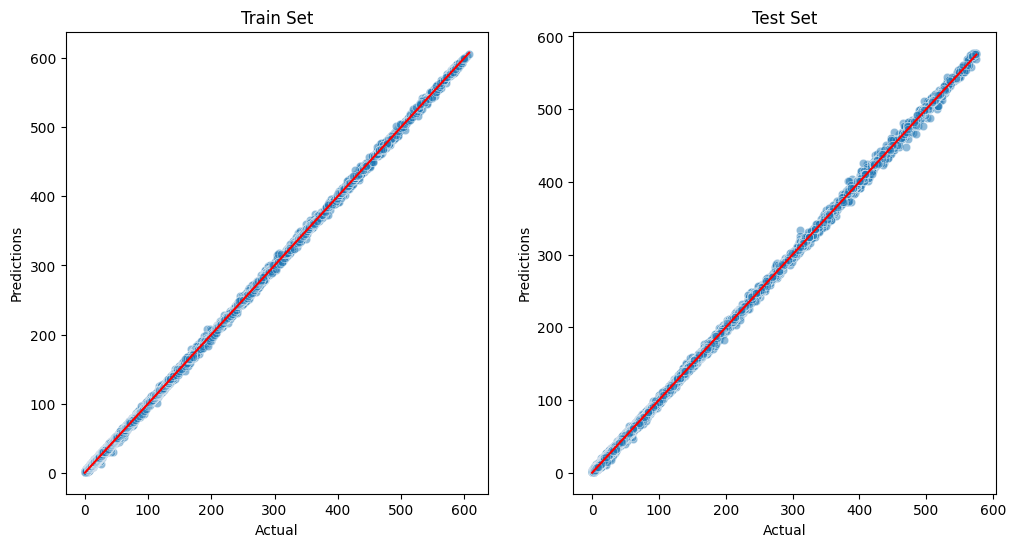

In [63]:
regression_performance(X_train, y_train, X_test, y_test, best_regressor_pipeline)
regression_evaluation_plots(X_train, y_train, X_test, y_test, best_regressor_pipeline)

### Observations

The **R2 score** (pipeline performance) is perfect 1.0 on the **df_train** and **df_test** sets respectively
* As the business requirement requests an R2 score of 0.7 or above, this is an exceptional result.

We also note that
* The predictions follow the actual values extremely well, (the blue dots follow along the red diagonal almost perfectly).
● We could have added more hyperparameters in the extensive search or considered more algorithms.
● The reason we selected fewer hyperparameter combinations in the notebook was to train all possible
models more quickly.
In your project you may want to consider more hyperparameters.
● If your hyperparameter combination almost reaches your performance criteria,
○ then you may want to add a few more hyperparameters with the expectation that it would reach the performance we stated in the business case.
● However, in this example, as our performance is very low, we'll explore other strategies. ○ We fitted a regressor pipeline using all available data.
 
■ However, it didn't meet our performance requirements
● What should we do?
● Does this mean the data doesn't have patterns to predict tenure properly for a prospect that will likely
churn?
● Is there any other strategy we could take, like before delivering this pipeline as our solution?
One strategy is to replace the feature selection step for a PCA (Principal Component Analysis) step. Next to refit our ML Pipeline with a PCA.

## Train the Model

Multiple regression and classification models under consideration 

* sklearn.linear_model.**LinearRegression**(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
* sklearn.linear_model.**LogisticRegression**(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
    * *.predict_proba(X)*
* sklearn.linear_model.**SGDRegressor**(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
    * *.SGDClassifier()*

List full of available and under consideration can be seen at scikitlearn [linear models](https://scikit-learn.org/stable/modules/linear_model.html#)

* No one optimal model. the most appropriate seems .LogisticRegression()
<!-- 
**.LinearRegression()** - Ordinary Least Squares
**.SGDClassifier()** and **.SGDRegressor()** - Stochastic Gradient Descent - SGD
.Ridge() 
.Lasso()
.MultiTaskLasso()
.ElasticNet()
.MultiTaskElasticNet()
.Lars() - Least Angle Regression
.LassoLars()
.OrthogonalMatchingPursuit() and orthogonal_mp()
.BayesianRidge() - Bayesian Regression
.ARDRegression() - Automatic Relevance Determination
Generalized Linear Models
**.LogisticRegression()** + **.predict_proba(X)**
.TweedieRegressor()
.Perceptron()
.PassiveAggressiveClassifier() and .PassiveAggressiveRegressor()
Robustness regression: outliers and modeling errors
.RANSACRegressor()
.TheilSenRegressor() and 
.HuberRegressor()
.QuantileRegressor()
Polynomial regression: extending linear models with basis functions
.PolynomialFeatures() transformer -->


Models with **R² score** = 1.0

In [64]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train,y_train)

print('Intercept :', linreg.intercept_)
print('Coefficients :\n', linreg.coef_)
linreg

Intercept : -155.70499088778337
Coefficients :
 [ 5.63605506e-01  8.08585054e+01  1.60358969e-01 -5.01446042e-03
 -8.07811592e+01  1.46301505e-02]


LinearRegression()

In [65]:
from sklearn.linear_model import SGDRegressor
SGDreg = SGDRegressor()
SGDreg.fit(X_train,y_train)
print('Intercept :', SGDreg.intercept_)
print('Coefficients :\n', SGDreg.coef_)
SGDreg

Intercept : [-8.95161221e+09]
Coefficients :
 [ 1.28410179e+10 -1.08856142e+10 -1.91961051e+10  1.95842713e+10
 -3.03098491e+09  8.63240338e+09]


SGDRegressor()

In [66]:
from sklearn.ensemble import ExtraTreesRegressor
XTRreg = ExtraTreesRegressor()
XTRreg.fit(X_train,y_train)

ExtraTreesRegressor()

Subsequent Models

In [67]:
from sklearn.ensemble import RandomForestRegressor
RFreg = RandomForestRegressor()
RFreg.fit(X_train,y_train)

RandomForestRegressor()

In [68]:
from sklearn.tree import DecisionTreeRegressor
DTreg = DecisionTreeRegressor()
DTreg.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
from xgboost import XGBRegressor
XGBreg = XGBRegressor()
XGBreg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
GBreg = GradientBoostingRegressor()
GBreg.fit(X_train,y_train)

GradientBoostingRegressor()

In [71]:
from sklearn.ensemble import AdaBoostRegressor
ABreg = AdaBoostRegressor()
ABreg.fit(X_train,y_train)

AdaBoostRegressor()

### Predictions and Model Evaluation
* A good metric for this is the **coefficient of determination** also called **r2-score**.
* A good metric for this is the **median_absolute_error**.
* Consider Cross validation

In [72]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

from sklearn.metrics import r2_score
prediction_linear = linreg.predict(X_test)
prediction_SGDreg = SGDreg.predict(X_test)
prediction_XTRreg = XTRreg.predict(X_test)
prediction_RFreg = RFreg.predict(X_test)
prediction_DTreg = DTreg.predict(X_test)
prediction_XGBreg = XGBreg.predict(X_test)
prediction_GBreg = GBreg.predict(X_test)
prediction_ABreg = ABreg.predict(X_test)

print('prediction_linreg :', r2_score(y_test,prediction_linear))
print('prediction_SGDreg :', round(r2_score(y_test,prediction_SGDreg)))
print('prediction_XTRreg :', r2_score(y_test,prediction_XTRreg))
print('prediction_RFreg :', r2_score(y_test,prediction_RFreg))
print('prediction_DTreg :', r2_score(y_test,prediction_DTreg))
print('prediction_XGBreg :', r2_score(y_test,prediction_XGBreg))
print('prediction_GBreg :', r2_score(y_test,prediction_GBreg))
print('prediction_ABreg :', r2_score(y_test,prediction_ABreg))


prediction_linreg : 0.6362123748806392
prediction_SGDreg : -724844344329774301184
prediction_XTRreg : 0.9990402066880703
prediction_RFreg : 0.9996902946305902
prediction_DTreg : 0.9993839802055697
prediction_XGBreg : 0.9996577720346448
prediction_GBreg : 0.9996469111184378
prediction_ABreg : 0.9926989722157485


In [ ]:
# from sklearn.metrics import classification_report

# prediction = linreg.predict(X_test)
# print(classification_report(y_test,prediction))

---

## Save Datasets 
Save the files to **/models** folder

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/models/RULRegressor')
except Exception as e:
  print(e)

grid_search_summary.to_csv(f'outputs/datasets/models/RULRegressor/GS_summary.csv',index=False)
grid_search_pipelines.to_csv(f'outputs/datasets/models/RULRegressor/GS_pipelines.csv',index=False)
# linreg.to_csv(f'outputs/datasets/models/RULRegressor/RUL_linreg.csv',index=False)
# ABreg.to_csv(f'outputs/datasets/models/RULRegressor/RUL_ABreg.csv',index=False)

df_total.to_csv(f'outputs/datasets/models/df_total.csv',index=False)
df_total_model.to_csv(f'outputs/datasets/models/df_total_model.csv',index=False)
df_train.to_csv(f'outputs/datasets/models/df_train.csv',index=False)
df_train_even_dist.to_csv(f'outputs/datasets/models/df_train_even_dist.csv',index=False)
df_test.to_csv(f'outputs/datasets/models/df_test.csv',index=False)